In [0]:
%pip install pydantic-settings
from pydantic_settings import BaseSettings

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
base = pd.read_csv("/Volumes/airports_database/default/airports_database/airports-database.csv")

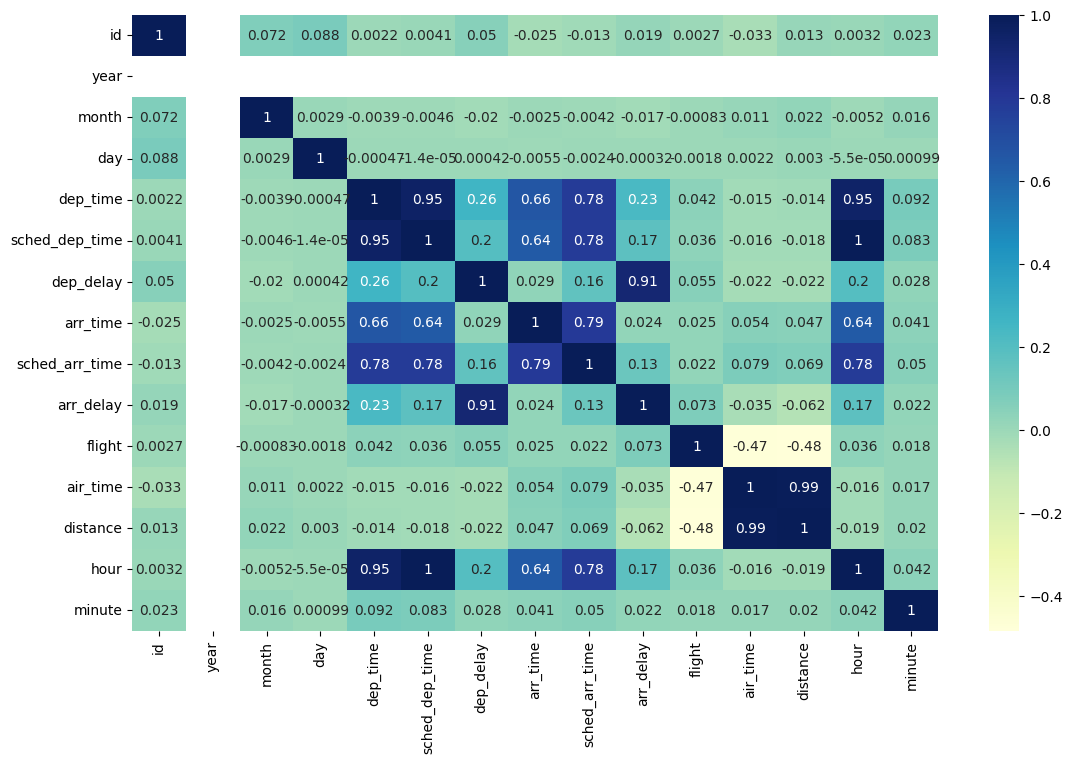

In [0]:
# Mostrando a correlação entre as variáveis
numeric_base = base.select_dtypes(include='number')
plt.figure(figsize=(13,8))
sns.heatmap(numeric_base.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [0]:
# Vou escolher o que tiver correlação mais alta e Landsize pois retiramos o BuildingArea
base1 = base[["arr_delay","dep_delay","sched_dep_time","dep_time","sched_arr_time","arr_time","hour"]]

In [0]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   arr_delay       327346 non-null  float64
 1   dep_delay       328521 non-null  float64
 2   sched_dep_time  336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_arr_time  336776 non-null  int64  
 5   arr_time        328063 non-null  float64
 6   hour            336776 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 18.0 MB


In [0]:
# Tratando valores nulos: retirando esses valores
base1 = base1.dropna(axis=0)

In [0]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   arr_delay       327346 non-null  float64
 1   dep_delay       327346 non-null  float64
 2   sched_dep_time  327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_arr_time  327346 non-null  int64  
 5   arr_time        327346 non-null  float64
 6   hour            327346 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 20.0 MB


In [0]:
base1.head()

,arr_delay,dep_delay,sched_dep_time,dep_time,sched_arr_time,arr_time,hour
0,11.0,2.0,515,517.0,819,830.0,5
1,20.0,4.0,529,533.0,830,850.0,5
2,33.0,2.0,540,542.0,850,923.0,5
3,-18.0,-1.0,545,544.0,1022,1004.0,5
4,-25.0,-6.0,600,554.0,837,812.0,6


In [0]:
Y = base1.arr_delay
X = base1.drop('arr_delay', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

In [0]:
# Importando o modelo
from sklearn.linear_model import LinearRegression

# Instanciando
modelo_regressao = LinearRegression()

# Realizando o fit do modelo
modelo_regressao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

In [0]:
# Avaliando o erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste,y_regressao)
print(erro_quadratico_regressao)

326.8663294547893


In [0]:
# Avaliando o R quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste,y_regressao)
print(r2_regressao)

0.8351016489584342


In [0]:
base2 = base[["arr_delay","dep_delay","sched_dep_time","dep_time","sched_arr_time","arr_time","hour"]]

In [0]:
base2.head()

,arr_delay,dep_delay,sched_dep_time,dep_time,sched_arr_time,arr_time,hour
0,11.0,2.0,515,517.0,819,830.0,5
1,20.0,4.0,529,533.0,830,850.0,5
2,33.0,2.0,540,542.0,850,923.0,5
3,-18.0,-1.0,545,544.0,1022,1004.0,5
4,-25.0,-6.0,600,554.0,837,812.0,6


In [0]:
# Verificando valores nulos e tratando
base2 = base2.dropna(axis=0)

base2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   arr_delay       327346 non-null  float64
 1   dep_delay       327346 non-null  float64
 2   sched_dep_time  327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_arr_time  327346 non-null  int64  
 5   arr_time        327346 non-null  float64
 6   hour            327346 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 20.0 MB


In [0]:
# Separando a base
Y = base2.arr_delay
X = base2.drop('arr_delay', axis=1)

# Dividindo em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y)

## Fazendo o fit para os novos dados
# Instanciando
modelo_regressao2 = LinearRegression()

# Realizando o fit do modelo
modelo_regressao2.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao2 = modelo_regressao2.predict(x_teste)

## Avaliando os erros
# Erro quadrático médio
erro_quadratico_regressao2 = mean_squared_error(y_teste,y_regressao2)
print(erro_quadratico_regressao2)

# R quadrado
r2_regressao2 = r2_score(y_teste,y_regressao2)
print(r2_regressao2)

324.5947301433515
0.8434130059874155


In [0]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor

# Instanciando
modelo_arvore_decisao = DecisionTreeRegressor()

# Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [0]:
## Avaliando os erros
# Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste,y_arvore_decisao)
print(erro_quadratico_arvore_decisao)

# R quadrado
r2_arvore_decisao = r2_score(y_teste,y_arvore_decisao)
print(r2_arvore_decisao)

36.64450065373853
0.9823224110818836


In [0]:
print('Regressão Linear')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao,2)))
print('R quadrado: '+ str(round(r2_regressao,4)))
print('-----------------------------------------')
print('Regressão Linear: novas features')
print('Erro quadrático médio: ' + str(round(erro_quadratico_regressao2,2)))
print('R quadrado: '+ str(round(r2_regressao2,4)))
print('-----------------------------------------')
print('Árvore de Decisão')
print('Erro quadrático médio: ' + str(round(erro_quadratico_arvore_decisao,2)))
print('R quadrado: '+ str(round(r2_arvore_decisao,4)))

Regressão Linear
Erro quadrático médio: 326.87
R quadrado: 0.8351
-----------------------------------------
Regressão Linear: novas features
Erro quadrático médio: 324.59
R quadrado: 0.8434
-----------------------------------------
Árvore de Decisão
Erro quadrático médio: 36.64
R quadrado: 0.9823


In [0]:
import pickle
import zipfile

path_pkl = "/Workspace/Users/ulisses.bomjardim@gmail.com/ulisses.bomjardim@gmail.com/PicPay/model/modelo_arvore_decisao.pkl"
path_zip = "/Workspace/Users/ulisses.bomjardim@gmail.com/ulisses.bomjardim@gmail.com/PicPay/model/modelo_arvore_decisao.zip"

with open(path_pkl, "wb") as f:
    pickle.dump(modelo_arvore_decisao, f)

with zipfile.ZipFile(path_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(path_pkl, arcname="modelo_arvore_decisao.pkl")